## Multi Linear Regression
### with House Prediction Dataset

In [1]:
# importing dataset
from sklearn.datasets import fetch_california_housing

In [2]:
# importing requried libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
california = fetch_california_housing()

In [4]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
# summary of data (what I understood)
# this is collection of dictionary (bunch) having features as 'feature_names' 
# and numerical data is stored in a dict with key 'data' whereas
# 'target' stores the values for target/output feature 'target_names'

In [6]:
type(california)

sklearn.utils._bunch.Bunch

In [7]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
california['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
california['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [10]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [11]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [13]:
print(california.target_names)

['MedHouseVal']


In [14]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [15]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [16]:
# preparing the dataset 
df = pd.DataFrame(california.data, columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
# adding target column as named 'Price'
df['Price'] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
# observing dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
# descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
# observing corr
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

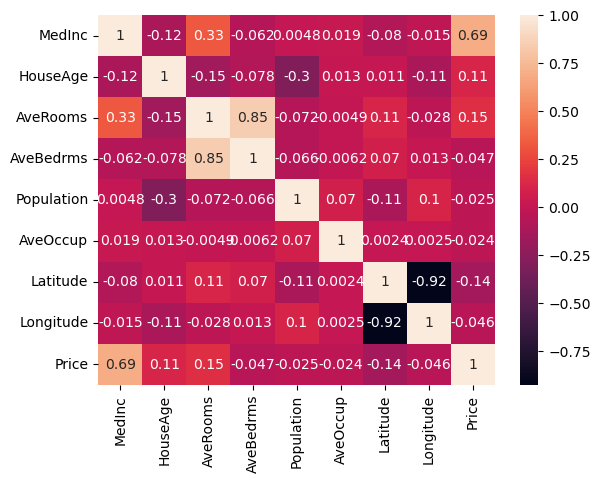

In [21]:
# visualizing using heatmap
sns.heatmap(df.corr(),annot=True)

In [22]:
# segregating dependent and independent features

X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1] # dependent feature

In [23]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [25]:
# spliting the dataset into test train datasets
from sklearn.model_selection import train_test_split

In [26]:
# spliting dataset with 33% test data
X_test, X_train, y_test, y_train = train_test_split( X , y, test_size=0.33, random_state=10)

In [27]:
# shapes
X_test.shape, X_train.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (6812,), (13828,))

In [28]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# we don't do this for output feature

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [32]:
regressor

LinearRegression()

In [33]:
# training the data
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
# since we have 8 independent features, it will provide 8 coefficient values or slopes
regressor.coef_

array([ 0.85922572,  0.11093423, -0.32036984,  0.32674861, -0.01657407,
       -0.0563264 , -0.83407483, -0.81840244])

In [35]:
regressor.intercept_

2.078873062243106

In [36]:
# the predicting the test data
y_pred = regressor.predict(X_test)
y_pred

array([2.15051183, 1.2477086 , 2.30924941, ..., 2.83087397, 1.74325094,
       1.90159581])

In [37]:
# Performance Metrics (to check error)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.521450873513574
Mean Absolute Error :  0.5307795611505755
Root Mean Squared Error :  0.72211555412799


In [38]:
# R square and adjusted R square (to check accuracy of the model)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.6043723761198485


In [39]:
# obviously accuracy is 60% which is less

In [40]:
# adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6041433421093527

### Assumptions

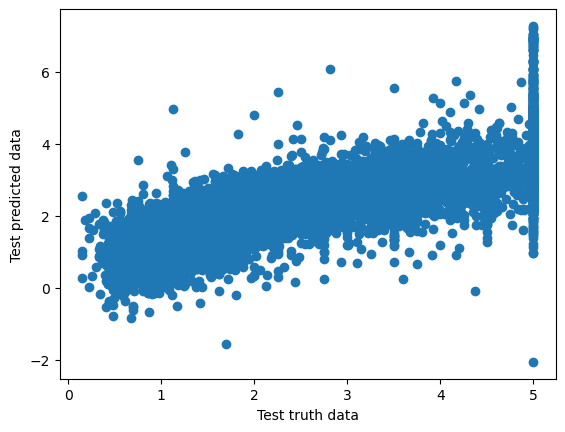

In [41]:
# Assumptions 
# 1. Scatter plot

plt.scatter(y_test,y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')
plt.show()

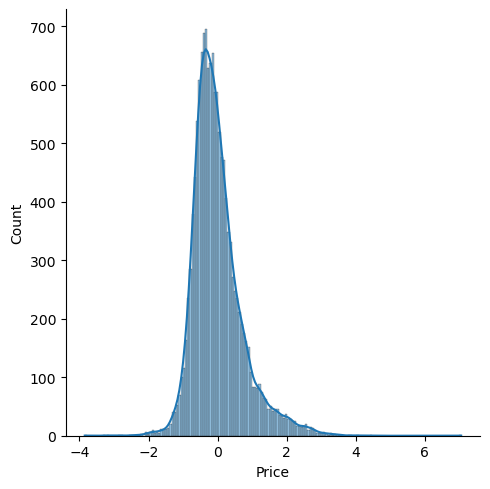

In [42]:
# Assumptions
# 2. Residuals
# looks like uniform/normal distribution, means model performed good
residuals = y_test - y_pred

sns.displot(residuals, kde=True)
plt.show()

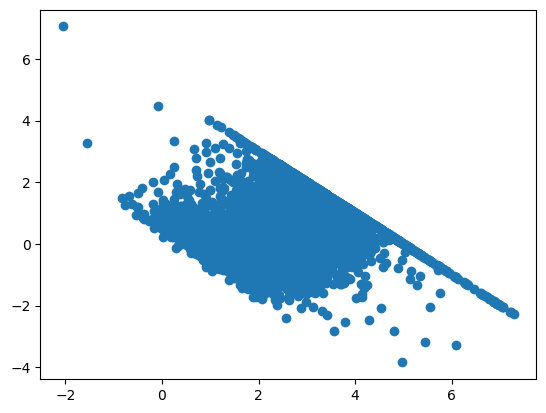

In [43]:
# Assumptions
# 3. Scatter plot with residuals and predicted value
# Should be uniform 
# But it is showing linear and not unifromly distributed ( means no pattern) hence not a good model 
# it can be further optimized 

plt.scatter(y_pred,residuals)
plt.show()

what if I want to take this model and deploy it into cloud for prediction, in what format I can do so?

## Pickling

Pickling in Python refers to the process of serializing an object, which means converting the object into a byte stream. This allows you to save Python objects to a file or send them over a network, and later unpickle them to reconstruct the original object.
<br>
Key Points:<br>
Serialization: Converting a Python object (like lists, dictionaries, or custom objects) into a byte stream.<br>
Deserialization (Unpickling): Converting the byte stream back into the original Python object.

In [44]:
# e.g.
import pickle

# Example Python object
data = {'name': 'Alice', 'age': 25, 'city': 'New York'}

# Pickling (serializing the object)
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Unpickling (deserializing the object)
with open('data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)

{'name': 'Alice', 'age': 25, 'city': 'New York'}


In [45]:
# pickling our model 
import pickle

pickle.dump(regressor, open('model.pkl','wb'))

In [46]:
# unpickling our model
# we have to load the same .pkl file that we created usinf dump

modell = pickle.load(open('model.pkl','rb'))

In [47]:
# now we can use our model for predictions

modell.predict(X_test)

array([2.15051183, 1.2477086 , 2.30924941, ..., 2.83087397, 1.74325094,
       1.90159581])

## Some Important Questions

### 1. **What is multiple linear regression?**
**Answer**: Multiple linear regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. The goal is to find the best-fit line that explains the relationship.

### 2. **What are the assumptions of multiple linear regression?**
**Answer**:
- **Linearity**: The relationship between the dependent and independent variables is linear.
- **Independence**: Observations are independent of each other.
- **Homoscedasticity**: Constant variance of errors across all levels of independent variables.
- **No multicollinearity**: Independent variables should not be highly correlated.
- **Normality of residuals**: The residuals (errors) should follow a normal distribution.

### 3. **What is multicollinearity, and how do you detect it?**
**Answer**: Multicollinearity occurs when two or more independent variables are highly correlated, making it difficult to assess the individual effect of each variable. It can be detected using:
- **Variance Inflation Factor (VIF)**: If VIF > 10, multicollinearity is a concern.
- **Correlation matrix**: High correlation values (above 0.8 or 0.9) between independent variables may indicate multicollinearity.

### 4. **How do you interpret the coefficients in multiple linear regression?**
**Answer**: The coefficient of each independent variable represents the change in the dependent variable for a one-unit change in that independent variable, keeping all other variables constant. For example, if the coefficient of an independent variable is 2, it means that for every one-unit increase in that variable, the dependent variable will increase by 2 units, assuming other variables remain constant.

### 5. **How do you evaluate the performance of a multiple linear regression model?**
**Answer**:
- **R-squared**: Measures how well the independent variables explain the variability of the dependent variable. A higher R-squared indicates a better fit.
- **Adjusted R-squared**: Adjusted for the number of independent variables in the model, providing a more accurate measure.
- **F-statistic**: Tests the overall significance of the model.
- **Root Mean Squared Error (RMSE)**: Measures the average error between predicted and actual values.